**Import required libraries**

In [1]:
import intake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

**Open the NWM intake catalog**

In [2]:
catalog = intake.open_catalog('s3://nextgen-dmac-cloud-ingest/nwm_ll/nwm_intake.yml',storage_options={'anon':True})
(list(catalog))

['NWM_Best_CONUS_Short_Range',
 'NWM_Best_CONUS_Medium_Range',
 'NWM_Best_Alaska_Short_Range',
 'NWM_Best_Alaska_Medium_Range',
 'NWM_Best_Hawaii_Short_Range',
 'NWM_Best_PuertoRico_Short_Range']


&nbsp;

**Select the catalog entry to open**

In [10]:
cat = catalog['NWM_Best_Alaska_Medium_Range']
ds = cat.to_dask()
ds

<xarray.Dataset>
Dimensions:         (feature_id: 391528, time: 546, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 11 12 ... 75005400047363 75005400047364
    latitude        (feature_id) float32 dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 2024-02-15T12:00:00
  * time            (time) datetime64[ns] 2024-02-15T13:00:00 ... 2024-03-09T...
Data variables:
    altitude        (feature_id) float32 dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-15_13:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1




&nbsp;
**Set the set the feature ID and time bounds to extract**

In [13]:
feature_id = 19020190088835
start_t='2024-02-23T13:00'
end_t = '2024-02-29T02:00'


&nbsp;

**Extract and plot the timeseries data**

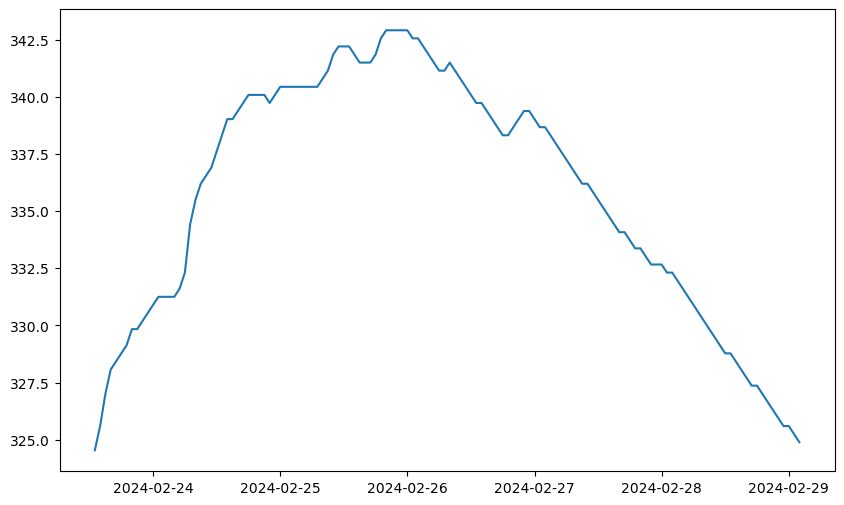

CPU times: user 1.91 s, sys: 135 ms, total: 2.04 s
Wall time: 2.49 s


In [14]:
%%time
ts_ds = ds.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:]*35.3147)

plt.show()